<a href="https://colab.research.google.com/github/shulaxshan/Random-Forest-Regression/blob/main/Petrol_consumpion_Prediction_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Petrol consumption prediction using Random Forest Regression model

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('petrol_consumption.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

In [4]:
dataset.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [5]:
dataset.describe()

Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000

##Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Decision Tree Regression model

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
#Compared Actual y test value with predicted y value

from numpy.core.multiarray import concatenate
#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

print(y_pred)
print(concatenate(  
    (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1
)
)

[573.3 537.7 595.7 587.1 623.9 601.1 593.8 577.7 457.2 566.9]
[[573.3 534. ]
 [537.7 410. ]
 [595.7 577. ]
 [587.1 571. ]
 [623.9 577. ]
 [601.1 704. ]
 [593.8 487. ]
 [577.7 587. ]
 [457.2 467. ]
 [566.9 580. ]]


In [10]:
from sklearn import metrics
print("Training set score: {:.7f}".format(regressor.score(X_train, y_train)))
print("Test set score: {:.7f}".format(regressor.score(X_test, y_test)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training set score: 0.9076230
Test set score: 0.2659865
Mean Absolute Error: 49.059999999999995
Mean Squared Error: 4300.907999999999
Root Mean Squared Error: 65.58130831265872


######We got 90% score on training data.
######On test data we got 26% score because we did not provide any tuning parameters while intializing the tree.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


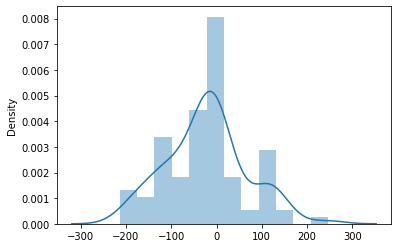

In [11]:
prediction=regressor.predict(X_test)

# checking difference between labled y and predicted y
sns.distplot(y_test-prediction)

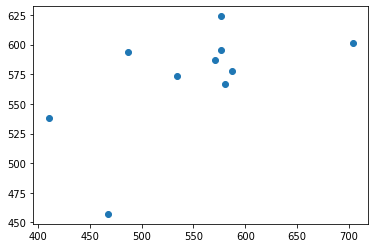

In [12]:
plt.scatter(y_test,y_pred)

# Try with hyperparameter tuning

In [16]:
# Hyper parameters range intialization for tuning 

parameters={
           "n_estimators" : [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)],
           "max_features" : ['auto', 'sqrt'],
           "max_depth" : [int(x) for x in np.linspace(5, 30, num = 6)],
           "min_samples_split" : [None,2, 5, 10, 15, 100],
           "min_samples_leaf" : [1, 2, 5, 10] }

In [17]:
from sklearn.model_selection import GridSearchCV

tuning_model = GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [18]:
#fit into whole dataset
tuning_model.fit(X,y)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16122.767 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16750.397 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7150.099 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10091.238 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-5455.918 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10185.009 total time=   0.0s
[CV 1/3] END max_depth=5, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-8215.788 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-5081.029 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9399.774 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7990.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4759.023 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8706.620 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7896.978 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4721.312 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8612.543 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7690.560 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4743.546 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9149.307 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7327.090 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4777.884 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9678.015 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7875.289 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4482.818 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9542.185 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7623.911 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4674.805 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9555.311 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10073.675 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4574.228 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-11268.432 total time=   0.0s
[CV 1/3] END max_depth=5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8073.269 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4006.543 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11140.918 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7942.012 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3807.605 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10020.552 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7922.636 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3842.842 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10116.041 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7855.005 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3816.194 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10494.115 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7587.519 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3994.170 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10857.913 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7968.303 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3763.704 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10605.469 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7719.579 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3959.541 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10551.763 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-12551.960 total time=   0.0s
[CV 1/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9044.726 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9211.744 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9107.074 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8899.336 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9212.101 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8963.588 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-10574.113 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3440.422 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15494.958 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-10325.420 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-13744.525 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8663.590 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3580.934 total time=   0.0s
[CV 3/3] END max_depth=5, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7345.495 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3453.998 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7229.746 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7385.059 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3268.654 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7732.839 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7478.557 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3305.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7853.493 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7277.616 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3285.236 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7952.917 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-7115.277 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3348.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8333.843 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7500.264 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3226.543 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8266.893 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7215.672 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3302.815 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8171.507 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8667.118 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-7560.950 total time=   0.0s
[CV 1/3] END max_depth=5, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7362.881 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3298.084 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7413.480 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7410.318 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3228.975 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7836.270 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7539.407 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3277.848 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7928.678 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7337.582 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3249.289 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8017.457 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7186.222 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3337.549 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8410.253 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7554.002 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3199.428 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8445.889 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7348.075 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3281.381 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8314.592 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-8923.892 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10617.388 total time=   0.0s
[CV 1/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_depth=5, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-13508.207 total time=   0.0s
[CV 1/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=au

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-9452.266 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-11460.958 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-6780.097 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10416.002 total time=   0.0s
[CV 2/3] END max_depth=5, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-2821.906 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9026.269 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10142.447 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3062.508 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10600.864 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-9469.671 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-2978.476 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-9795.803 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10048.863 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-2923.602 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10365.147 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10013.354 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-2995.423 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10473.677 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9652.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-2987.699 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-10688.379 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10065.609 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3085.315 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10513.035 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9937.812 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3104.818 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10416.963 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12591.788 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4322.012 total time=   0.0s
[CV 3/3] END max_depth=5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11900.702 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3509.915 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-9059.757 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11417.205 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3679.101 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10387.465 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10466.369 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3384.213 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9963.002 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10657.866 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3410.857 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10552.004 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10372.971 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3368.110 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10673.706 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10085.158 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3330.461 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10968.334 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10387.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3352.939 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10778.493 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10521.017 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3290.974 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10893.697 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11590.150 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11628.797 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12574.718 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12426.781 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12044.134 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.085 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12558.779 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3815.994 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12487.913 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3806.604 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14362.052 total time=   0.0s
[CV 1/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-10265.410 total time=   0.0s
[CV 1/3] END max_depth=5, max_feature

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-11879.286 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3593.088 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-9031.652 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10343.490 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.538 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9199.798 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9738.813 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.556 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9480.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9907.507 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3351.930 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9801.027 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9907.137 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3235.505 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9678.992 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9730.811 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3294.988 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9932.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-9835.095 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3381.452 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10030.462 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9731.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3335.549 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10020.515 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s
[CV 3/3] END max_depth=5

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-11689.621 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3632.432 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-8975.703 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-10726.250 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3339.936 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9074.356 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10009.111 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3227.584 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9153.743 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9896.962 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3436.651 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9614.768 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9849.448 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.708 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9541.803 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9806.571 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3383.670 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9863.710 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9966.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3482.812 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10021.041 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10069.139 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3397.806 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10065.534 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10663.443 total time=   0.0s
[CV 1/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10991.280 total time=   0.0s
[CV 1/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=5, m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13146.989 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-14190.898 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5966.646 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-13517.754 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sq

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_dept

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16742.750 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-17664.625 total time=   0.0s
[CV 3/3] END max_depth=10, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9430.865 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-8217.343 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-4250.698 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9349.020 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-7863.376 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-4986.347 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9327.748 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7653.195 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4630.256 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8801.995 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7761.684 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4588.170 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8708.012 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7573.981 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4664.322 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9045.554 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7261.205 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4696.301 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9604.938 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7804.061 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4461.555 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9477.860 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7652.138 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4635.309 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9425.466 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10070.870 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4560.172 total time=   0.0s
[CV 3/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-8477.170 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3552.882 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11011.584 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8050.299 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4005.158 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10911.012 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7933.684 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3788.833 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9832.748 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7990.857 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3821.746 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-9962.315 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7902.394 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3786.771 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10378.617 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7624.591 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3966.897 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10747.708 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7981.993 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3737.634 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10486.961 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7761.820 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3929.689 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10449.371 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-12551.960 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9036.395 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9204.711 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9101.454 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8894.512 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9207.736 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8967.312 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14018.552 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=10, max_feat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8459.700 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3580.934 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-7391.470 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-7136.029 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3198.455 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-7295.798 total time=   0.0s
[CV 1/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3457.783 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7227.336 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7284.548 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3270.377 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7723.098 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7382.698 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3317.403 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7849.007 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7154.141 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3293.046 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7949.466 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-6998.366 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3349.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8329.356 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7376.710 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3224.703 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8261.753 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7159.365 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3296.788 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8166.621 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8668.603 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-7572.079 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3289.781 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7428.211 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7364.972 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3222.340 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7846.879 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7495.241 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3272.143 total time=   0.1s
[CV 3/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7297.183 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3244.273 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8029.467 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7148.573 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3333.394 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8414.840 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7514.810 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3195.467 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8449.266 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7313.904 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3277.734 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8317.942 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-9741.798 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-3691.842 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-10104.737 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-13508.207 total time=   0.0s
[CV 1/3] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-14091.374 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-8658.375 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-12376.125 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7362.375 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10056.417 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-3771.045 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-8928.582 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9665.244 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3342.194 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10873.388 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8804.697 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-3144.270 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-10244.251 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-9319.043 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-3126.492 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10852.617 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9207.181 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-3147.394 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10864.497 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-8792.877 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-3102.120 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-11099.836 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9286.662 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3161.022 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10840.808 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-8998.738 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3226.492 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10905.417 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12663.486 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4341.716 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-9582.628 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11936.787 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3792.726 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-9223.939 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11175.869 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3837.022 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10494.096 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10086.235 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3449.556 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10046.233 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10309.759 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3464.552 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10628.718 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-9933.654 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3420.543 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10770.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-9716.548 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3400.481 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-11001.146 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10058.123 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3417.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10815.197 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10237.751 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3387.403 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10911.449 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14638.293 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3368.882 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-13079.273 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11612.986 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12565.145 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12418.750 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12037.813 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.982 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12553.193 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3816.883 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12482.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3807.364 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14362.052 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15276.427 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3461.438 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-14881.875 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=10, max_fe

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8564.338 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-11926.685 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3596.361 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-9281.345 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10379.178 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.375 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9457.838 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9754.721 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.037 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9695.832 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9934.362 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3350.527 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9983.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9937.341 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3236.271 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9816.192 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9805.673 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3296.023 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-10037.233 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10045.745 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3379.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10119.201 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9992.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3334.409 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10092.120 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-11837.734 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3627.984 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-8979.907 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-11053.475 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3337.830 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9093.832 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10039.112 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3226.420 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9182.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9935.552 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3435.825 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9636.764 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9865.833 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.164 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9559.427 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9820.268 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3382.521 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9879.166 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9977.512 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3481.692 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10035.416 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10080.376 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3396.748 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10070.405 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10663.443 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-12269.961 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-14501.252 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-4251.521 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-11963.008 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13146.989 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-12901.398 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-14190.898 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5966.646 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-13517.754 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END m

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-15116.033 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16742.750 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-17664.625 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7757.750 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9757.743 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-5772.290 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9430.865 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-7863.376 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-4986.347 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9329.776 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7653.195 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4630.256 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8802.968 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7761.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4588.170 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8708.853 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7573.981 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4664.322 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-8911.307 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7261.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4696.301 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9487.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7804.061 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4461.555 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9373.746 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7652.138 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4635.309 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9333.386 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10070.870 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4560.172 total time=   0.0s
[CV 3/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-8477.170 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3552.882 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11011.584 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8050.299 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4005.158 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10911.012 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7933.684 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3788.833 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9832.748 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7990.857 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3821.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-9962.315 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7902.394 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3786.771 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10378.617 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7624.591 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3966.897 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10747.708 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7981.993 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3737.634 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10486.961 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7761.820 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3929.689 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10449.371 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-12551.960 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-9256.738 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9036.395 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9204.711 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9101.454 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8894.512 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9207.736 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8967.312 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-10574.113 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3440.422 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15494.958 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-10325.420 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-13744.525 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8459.700 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3580.934 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-7391.470 total time=   0.0s
[CV 1/3] END max_depth

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7201.941 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3457.783 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7227.336 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7284.548 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3270.377 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7723.098 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7382.698 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3317.403 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7849.007 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7154.141 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3293.046 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7949.466 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-6998.366 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3349.985 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8329.356 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7376.710 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3224.703 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8261.753 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7159.365 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3296.788 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8166.621 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8668.603 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-7572.079 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3289.781 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7428.211 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7364.972 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3222.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7846.879 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7495.241 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3272.143 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7942.076 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7297.183 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3244.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8029.467 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7148.573 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3333.394 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8414.840 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7514.810 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3195.467 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8449.266 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7313.904 total time=   0.2s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3277.734 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8317.942 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-8923.892 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-9741.798 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-3691.842 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-10104.737 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.2s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-13508.207 total time=   0.0s
[CV 1/3] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.2s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-6839.685 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.2s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-8658.375 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-12376.125 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7362.375 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10056.417 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-3771.045 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-8928.582 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9665.244 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3342.194 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10871.826 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8850.722 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-3144.270 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-10243.103 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-9360.020 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-3126.492 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10851.628 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9241.784 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-3147.394 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10863.692 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-8821.497 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-3102.120 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-11099.144 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9312.239 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3161.022 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10840.194 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9021.624 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3226.492 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10904.881 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12663.486 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4341.716 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-9582.628 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11936.787 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3792.726 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-9223.939 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11175.869 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3837.022 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10494.096 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10086.235 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3449.556 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10046.233 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10309.759 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3464.552 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10628.718 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-9933.654 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3420.543 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10770.783 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-9716.548 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3400.481 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-11001.146 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10058.123 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3417.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10815.197 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10237.751 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3387.403 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10911.449 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14638.293 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3368.882 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-13079.273 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11612.986 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12565.145 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12418.750 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12037.813 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.982 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12553.193 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3816.883 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12482.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3807.364 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15276.427 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3461.438 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-14881.875 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-10265.410 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-11985.226 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3677.902 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8564.338 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-11926.685 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10379.178 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.375 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9457.838 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9754.721 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.037 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9695.832 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9934.362 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3350.527 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9983.934 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9937.341 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3236.271 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9816.192 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9805.673 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3296.023 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-10037.233 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10045.745 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3379.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10119.201 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9992.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3334.409 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10092.120 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-11837.734 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3627.984 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-8979.907 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-11053.475 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3337.830 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9093.832 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10039.112 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3226.420 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9182.425 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9935.552 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3435.825 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9636.764 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9865.833 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.164 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9559.427 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9820.268 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3382.521 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9879.166 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9977.512 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3481.692 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10035.416 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10080.376 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3396.748 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10070.405 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10663.443 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-12269.961 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10991.280 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.2s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-6017.612 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13146.989 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13146.989 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.2s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-12901.398 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-7257.868 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16742.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-17664.625 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7757.750 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9757.743 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-5772.290 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9430.865 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-8217.343 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-4250.698 total time=   0.0s
[CV 3/3] END max_dept

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-7863.376 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-4986.347 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9329.776 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7653.195 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4630.256 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8802.968 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7761.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4588.170 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8708.853 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7573.981 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4664.322 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-8911.307 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7261.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4696.301 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9487.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7804.061 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4461.555 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9373.746 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7652.138 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4635.309 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9333.386 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10070.870 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4560.172 total time=   0.0s
[CV 3/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-8477.170 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3552.882 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11011.584 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8050.299 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4005.158 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10911.012 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7933.684 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3788.833 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9832.748 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7990.857 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3821.746 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-9962.315 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7902.394 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3786.771 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10378.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7624.591 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3966.897 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10747.708 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7981.993 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3737.634 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10486.961 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7761.820 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3929.689 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10449.371 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-9835.139 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3480.873 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14103.730 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-9256.738 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9036.395 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9204.711 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9101.454 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8894.512 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9207.736 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8967.312 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14018.552 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-10574.113 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3440.422 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15494.958 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-10325.420 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-13744.525 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8459.700 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3580.934 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-7391.470 total time=   0.0s
[CV 1/3] END max_depth

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7201.941 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3457.783 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7227.336 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7284.548 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3270.377 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7723.098 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7382.698 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3317.403 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7849.007 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7154.141 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3293.046 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7949.466 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-6998.366 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3349.985 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8329.356 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7376.710 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3224.703 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8261.753 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7159.365 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3296.788 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8166.621 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8668.603 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-7572.079 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3289.781 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7428.211 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7364.972 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3222.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7846.879 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7495.241 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3272.143 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7942.076 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7297.183 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3244.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8029.467 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7148.573 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3333.394 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8414.840 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7514.810 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3195.467 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8449.266 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7313.904 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3277.734 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8317.942 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9012.551 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3256.923 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9395.227 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-8923.892 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-9741.798 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-3691.842 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-10104.737 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-11210.013 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s
[CV 3/3] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12000.036 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5977.591 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12553.362 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-6839.685 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-8658.375 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-12376.125 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7362.375 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10056.417 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-3771.045 total time=   0.0s
[CV 3/3] END max_depth=20

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9413.431 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9665.244 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3342.194 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10871.826 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8850.722 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-3144.270 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-10243.103 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-9360.020 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-3126.492 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10851.628 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9241.784 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-3147.394 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10863.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-8821.497 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-3102.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-11099.144 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9312.239 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3161.022 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10840.194 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9021.624 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3226.492 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10904.881 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12663.486 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4341.716 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-9582.628 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11175.869 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3837.022 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10494.096 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10086.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3449.556 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10046.233 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10309.759 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3464.552 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10628.718 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-9933.654 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3420.543 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10770.783 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-9716.548 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3400.481 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-11001.146 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10058.123 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3417.119 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10815.197 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10237.751 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3387.403 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10911.449 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11590.150 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14638.293 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3368.882 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-13079.273 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11612.986 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12565.145 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12418.750 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12037.813 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.982 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12553.193 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3816.883 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12482.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3807.364 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15276.427 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3461.438 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-14881.875 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-10265.410 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-11985.226 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3677.902 total time=   0.0s
[CV 3/3] END max_depth=2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3596.361 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-9281.345 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10379.178 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.375 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9457.838 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9754.721 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.037 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9695.832 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9934.362 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3350.527 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9983.934 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9937.341 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3236.271 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9816.192 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9805.673 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3296.023 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-10037.233 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10045.745 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3379.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10119.201 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9992.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3334.409 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10092.120 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8090.754 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-11837.734 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3627.984 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-8979.907 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-11053.475 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3337.830 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9093.832 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10039.112 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3226.420 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9182.425 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9935.552 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3435.825 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9636.764 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9865.833 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.164 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9559.427 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9820.268 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3382.521 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9879.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9977.512 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3481.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10035.416 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10080.376 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3396.748 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10070.405 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s
[CV 3/3] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-14245.365 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3852.132 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-11483.409 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-12269.961 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-14501.252 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-4251.521 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-11963.008 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-14190.898 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5966.646 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-13517.754 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-15116.033 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-15116.033 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16742.750 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-17664.625 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7757.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9757.743 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-5772.290 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9430.865 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-8217.343 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-4250.698 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9349.020 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-7863.376 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-4986.347 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9329.776 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7653.195 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4630.256 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8802.968 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7761.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4588.170 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8708.853 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7573.981 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4664.322 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-8911.307 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7261.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4696.301 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9487.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7804.061 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4461.555 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9373.746 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7652.138 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4635.309 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9333.386 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10070.870 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4560.172 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-11109.883 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-8477.170 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3552.882 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11011.584 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8050.299 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4005.158 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10911.012 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7933.684 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3788.833 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9832.748 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7990.857 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3821.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-9962.315 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7902.394 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3786.771 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10378.617 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7624.591 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3966.897 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10747.708 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7981.993 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3737.634 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10486.961 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7761.820 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3929.689 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10449.371 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-12551.960 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-9835.139 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3480.873 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14103.730 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-9256.738 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9036.395 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9204.711 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9101.454 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8894.512 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9207.736 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8967.312 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14018.552 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-13744.525 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8459.700 total time=   0.0s
[CV 2/3] END max_depth=25,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-7136.029 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3198.455 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-7295.798 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7201.941 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3457.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7227.336 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7284.548 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3270.377 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7723.098 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7382.698 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3317.403 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7849.007 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7154.141 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3293.046 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7949.466 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-6998.366 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3349.985 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8329.356 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7376.710 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3224.703 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8261.753 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7159.365 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3296.788 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8166.621 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8668.603 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-7572.079 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-7274.718 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3067.264 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-7464.407 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7328.591 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3289.781 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7428.211 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7364.972 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3222.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7846.879 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7495.241 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3272.143 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7942.076 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7297.183 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3244.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8029.467 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7148.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3333.394 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8414.840 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7514.810 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3195.467 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8449.266 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7313.904 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3277.734 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8317.942 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9012.551 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3256.923 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9395.227 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-8923.892 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10617.388 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-9741.798 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-3691.842 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-10104.737 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=a

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=25

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-5265.548 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-11210.013 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-5265.548 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-13508.207 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12000.036 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5977.591 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12553.362 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-14091.374 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-8658.375 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-12376.125 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7362.375 total time=   0.0s
[CV 1/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-8928.582 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-10194.977 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-3079.004 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9413.431 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9665.244 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3342.194 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10871.826 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8850.722 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-3144.270 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-10243.103 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-9360.020 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-3126.492 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10851.628 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9241.784 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-3147.394 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10863.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-8821.497 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-3102.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-11099.144 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9312.239 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3161.022 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10840.194 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9021.624 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3226.492 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10904.881 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12663.486 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4341.716 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-9582.628 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11175.869 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3837.022 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10494.096 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10086.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3449.556 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10046.233 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10309.759 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3464.552 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10628.718 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-9933.654 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3420.543 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10770.783 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-9716.548 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3400.481 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-11001.146 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10058.123 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3417.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10815.197 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10237.751 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3387.403 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10911.449 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14638.293 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3368.882 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-13079.273 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11612.986 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12565.145 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12418.750 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12037.813 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.982 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12553.193 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3816.883 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12482.871 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3807.364 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14362.052 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15276.427 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3461.438 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-14881.875 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-10265.410 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-11985.226 total time=   0.0s
[CV 2/3] END max_depth=25,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-11926.685 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3596.361 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-9281.345 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10379.178 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.375 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9457.838 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9754.721 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.037 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9695.832 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9934.362 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3350.527 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9983.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9937.341 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3236.271 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9816.192 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9805.673 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3296.023 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-10037.233 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10045.745 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3379.969 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10119.201 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9992.116 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3334.409 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10092.120 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-11837.734 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3627.984 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-8979.907 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-11053.475 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3337.830 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9093.832 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10039.112 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3226.420 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9182.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9935.552 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3435.825 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9636.764 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9865.833 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.164 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9559.427 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9820.268 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3382.521 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9879.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9977.512 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3481.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10035.416 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10080.376 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3396.748 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10070.405 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10663.443 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-14245.365 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3852.132 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-11483.409 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-12269.961 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10991.280 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13146.989 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13146.989 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-6017.612 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-13320.595 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-12901.398 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-15116.033 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-15116.033 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-15116.033 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-7257.868 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-18276.857 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.2s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.0s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_featu

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-16742.750 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-17664.625 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7757.750 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-9757.743 total time=   0.0s
[CV 2/3] END max_depth=30, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-8217.343 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-4250.698 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9349.020 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-7863.376 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-4986.347 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9329.776 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-7653.195 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-4630.256 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8802.968 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-7761.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-4588.170 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-8708.853 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-7573.981 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-4664.322 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-8911.307 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-7261.205 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-4696.301 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-9487.661 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-7804.061 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-4461.555 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9373.746 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-7652.138 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-4635.309 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9333.386 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-21632.629 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-19047.967 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-10070.870 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4560.172 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-11109.883 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-8477.170 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-3552.882 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=23;, score=-11011.584 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-8050.299 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-4005.158 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10911.012 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-7933.684 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3788.833 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-9832.748 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-7990.857 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3821.746 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-9962.315 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-7902.394 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3786.771 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10378.617 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-7624.591 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3966.897 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-10747.708 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-7981.993 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3737.634 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10486.961 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-7761.820 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3929.689 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10449.371 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-20386.805 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11783.668 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3886.735 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-12551.960 total time=   0.0s
[CV 1/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-9256.738 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-4064.121 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13372.617 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-9036.395 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3746.358 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-12493.642 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-9204.711 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-4034.684 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12660.218 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-9101.454 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-4050.719 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13104.472 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-8894.512 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-4271.372 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-13462.070 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-9207.736 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-4017.613 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13256.620 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-8967.312 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-4206.212 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12851.208 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-12259.673 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3247.686 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14018.552 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-10574.113 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3440.422 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15494.958 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-10325.420 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3549.973 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-14433.703 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-10311.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3441.123 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-13612.829 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-10596.466 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3530.983 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13753.553 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-10357.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3524.401 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-14262.327 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-9998.613 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3546.044 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-14699.626 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-10186.429 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-3459.943 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14566.021 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-9947.022 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-3552.031 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14184.317 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-25363.448 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-13744.525 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8459.700 total time=   0.0s
[CV 2/3] END max_depth=30,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3198.455 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-7295.798 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7201.941 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3457.783 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-7227.336 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7284.548 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3270.377 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-7723.098 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7382.698 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3317.403 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-7849.007 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7154.141 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3293.046 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-7949.466 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-6998.366 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3349.985 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-8329.356 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-7376.710 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3224.703 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-8261.753 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-7159.365 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3296.788 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-8166.621 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-21034.507 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-14355.711 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11365.784 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8668.603 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3476.569 total time=   0.0s
[CV 3/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-7274.718 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-3067.264 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=23;, score=-7464.407 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7328.591 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3289.781 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-7428.211 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7364.972 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3222.340 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-7846.879 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7495.241 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3272.143 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-7942.076 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-7297.183 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3244.273 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-8029.467 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-7148.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3333.394 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-8414.840 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-7514.810 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3195.467 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-8449.266 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-7313.904 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3277.734 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-8317.942 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-22087.950 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-10824.970 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-3433.150 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-9854.743 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9012.551 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3256.923 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-9395.227 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-8923.892 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3413.528 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-9171.147 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-8778.929 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3306.600 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-9255.896 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9091.916 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3543.792 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-9413.177 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-8819.707 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3459.232 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-9422.916 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-8727.397 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3638.475 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-9900.088 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-8987.683 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3479.262 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-9871.958 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-8713.015 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-3570.158 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-9818.022 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-15855.913 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-11372.063 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3340.312 total time=   0.0s
[CV 3/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-9741.798 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-3691.842 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-10104.737 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9788.551 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-3495.607 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-9781.433 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9935.660 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-3646.308 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-9964.742 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10295.251 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-3789.312 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-10207.995 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10091.340 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-3656.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-10363.119 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-9872.302 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-3738.969 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-10803.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10007.956 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-3691.638 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-10778.958 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-9776.820 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-3748.871 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-10701.450 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-12328.726 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12922.505 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-10591.774 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-10430.227 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12618.693 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-12328.726 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-10674.532 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-12798.642 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-10519.742 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-12828.120 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-10475.181 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5024.668 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-12886.822 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-10504.945 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5193.745 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12922.505 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-10591.774 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5168.206 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12735.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-10430.227 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5210.959 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-20196.030 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-13084.847 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-4866.517 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12891.871 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=23;, score=-12120.267 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-10625.682 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-4820.071 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-12328.726 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-10674.532 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5170.985 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-12798.642 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-10519.742 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5223.218 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-12828.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-10475.181 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5024.668 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-12886.822 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-10504.945 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5193.745 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12922.505 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-10591.774 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5168.206 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12735.166 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-10430.227 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5210.959 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12618.693 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-14500.749 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-14417.379 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-5719.530 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-13508.207 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12000.036 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-5977.591 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=23;, score=-12553.362 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-11280.958 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5395.228 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12779.888 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-11254.646 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5724.739 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13456.030 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-11081.831 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-5873.028 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-13471.014 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-11117.724 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-5721.024 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-13624.872 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-11222.535 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-5797.984 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-13662.678 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-11355.024 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-5745.934 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13437.238 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-11122.119 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-5837.648 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-13314.722 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-6839.685 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-14091.374 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-6598.159 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-6919.706 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-14148.201 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-6881.640 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-13841.878 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-6865.943 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-17970.069 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-14091.374 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-14148.201 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-13841.878 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-6865.943 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7115.446 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-14049.941 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-6839.685 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=23;, score=-17061.804 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-14091.374 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-17536.484 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-14442.360 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-6995.099 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-17545.278 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-14366.018 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-6919.706 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-17570.062 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-14148.201 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-6881.640 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-17869.258 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-13841.878 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-6865.943 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-17970.069 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-16966.187 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7115.446 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17425.477 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-14091.374 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-6598.159 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-16993.213 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-14145.382 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7007.205 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-17191.449 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-14275.876 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7141.470 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-17536.484 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-14442.360 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-6995.099 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-17545.278 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-14366.018 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-6919.706 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-17570.062 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-14148.201 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-6881.640 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-17869.258 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-13841.878 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-6865.943 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-17970.069 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-8658.375 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-12376.125 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=-7362.375 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=12;, score=-10056.417 total time=   0.0s
[CV 2/3] END max_depth=30, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-10194.977 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-3079.004 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=23;, score=-9413.431 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-9665.244 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-3342.194 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34;, score=-10871.826 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-8850.722 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-3144.270 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=45;, score=-10243.103 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-9360.020 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-3126.492 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=56;, score=-10851.628 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-9241.784 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-3147.394 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=67;, score=-10863.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-8821.497 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-3102.120 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=78;, score=-11099.144 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-9312.239 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-3161.022 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=89;, score=-10840.194 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-9021.624 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3226.492 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-10904.881 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-11531.478 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=-4884.067 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-12663.486 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-4341.716 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=12;, score=-9582.628 total time=   0.0s
[CV 1/3] END max_de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-11175.869 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-3837.022 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34;, score=-10494.096 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10086.235 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-3449.556 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=45;, score=-10046.233 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10309.759 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-3464.552 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=56;, score=-10628.718 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-9933.654 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-3420.543 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=67;, score=-10770.783 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-9716.548 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-3400.481 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=78;, score=-11001.146 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10058.123 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-3417.119 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=89;, score=-10815.197 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10237.751 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-3387.403 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-10911.449 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-11286.907 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=-4979.995 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-16091.433 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-3976.824 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=12;, score=-11590.150 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-14638.293 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-3368.882 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=23;, score=-13079.273 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-12745.989 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-3514.261 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=34;, score=-13779.553 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-11612.986 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-3486.244 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=45;, score=-13163.910 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-12565.145 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-3671.851 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=56;, score=-13409.333 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-12418.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-3713.497 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=67;, score=-13747.976 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-12037.813 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-3679.982 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=78;, score=-14124.907 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-12553.193 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-3816.883 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=89;, score=-13798.433 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-12482.871 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-3807.364 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-13659.856 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-11456.710 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1;, score=-5197.155 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-16174.147 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-3286.045 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=12;, score=-14362.052 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-15276.427 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-3461.438 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=23;, score=-14881.875 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-13848.237 total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-3717.974 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=34;, score=-15212.200 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-12932.964 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-3682.947 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=45;, score=-14403.175 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-13980.470 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-3833.126 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=56;, score=-14613.551 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-13756.672 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-3867.496 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=67;, score=-15012.608 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-13599.250 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-3897.768 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=78;, score=-15289.693 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-14177.200 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-4086.089 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=89;, score=-15066.134 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-13944.882 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-4109.150 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-14989.768 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=23;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=34;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-7378.174 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-11622.093 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=-10265.410 total time=   0.0s
[CV 1/3] END max_depth=30, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-3677.902 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12;, score=-8564.338 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-11926.685 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-3596.361 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=23;, score=-9281.345 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-10379.178 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-3346.375 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=34;, score=-9457.838 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9754.721 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-3244.037 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45;, score=-9695.832 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9934.362 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-3350.527 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56;, score=-9983.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9937.341 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-3236.271 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=67;, score=-9816.192 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-9805.673 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-3296.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=78;, score=-10037.233 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10045.745 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-3379.969 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=89;, score=-10119.201 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-9992.116 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-3334.409 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-10092.120 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-9521.778 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-12029.144 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=-11331.131 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-11381.530 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-3612.262 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=12;, score=-8090.754 total time=   0.0s
[CV 1/3] END max_d

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-11053.475 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-3337.830 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=34;, score=-9093.832 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-10039.112 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-3226.420 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=45;, score=-9182.425 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9935.552 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-3435.825 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=56;, score=-9636.764 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9865.833 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-3370.164 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=67;, score=-9559.427 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9820.268 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-3382.521 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=78;, score=-9879.166 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-9977.512 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-3481.692 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=89;, score=-10035.416 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10080.376 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-3396.748 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-10070.405 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-7887.542 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-13900.443 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-15467.691 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=12;, score=-4292.997 total time=   0.0s
[CV 3/3] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-14245.365 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-3852.132 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=23;, score=-11483.409 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-12269.961 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-3630.660 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=34;, score=-11082.157 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-11322.659 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-3627.269 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=45;, score=-10875.804 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11947.416 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-3874.847 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=56;, score=-11196.208 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11960.274 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-3861.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=67;, score=-11316.987 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11821.506 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-3830.705 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=78;, score=-11589.811 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-12115.822 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-3963.982 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=89;, score=-11569.934 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11936.027 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-4005.992 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-11689.739 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-7187.703 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-15103.219 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-3918.112 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=12;, score=-10991.280 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-14501.252 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-4251.521 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=23;, score=-11963.008 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-13188.861 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-4172.280 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=34;, score=-11603.694 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-12405.168 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-4160.213 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=45;, score=-11412.335 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-13087.586 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-4275.120 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=56;, score=-11762.338 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-13026.241 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-4324.174 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=67;, score=-12021.528 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12978.196 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-4300.046 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=78;, score=-12259.020 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-13361.498 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-4433.960 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=89;, score=-12341.586 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-13126.927 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-4445.608 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-12469.327 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_featur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=None, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max_dep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=23;, score=-13320.595 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34;, score=-13475.327 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-5802.049 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-12386.536 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-12152.846 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-5783.072 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-13891.954 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] END max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34;, score=-13475.327 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-11430.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=45;, score=-13391.135 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-11985.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=56;, score=-13720.752 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-11924.445 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-12086.705 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-12386.536 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-5725.856 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-12152.846 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-5783.072 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-13891.954 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-31939.246 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-10495.908 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1;, score=-11358.366 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-16035.423 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-7185.971 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=12;, score=-12918.092 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-11818.955 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-5556.052 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=34;, score=-13475.327 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-11430.914 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-5625.824 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=45;, score=-13391.135 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-11985.733 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-5802.049 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=56;, score=-13720.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-11924.445 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-5746.076 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=67;, score=-13795.914 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-12086.705 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-5634.127 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=78;, score=-13998.944 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-12386.536 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-5725.856 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=89;, score=-13843.918 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-12152.846 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-5783.072 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-13891.954 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-22403.435 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-8938.014 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1;, score=-13778.806 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-16194.597 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-6168.045 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=12;, score=-12901.398 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-12743.496 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-5812.828 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=34;, score=-13705.603 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-12352.562 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-5893.045 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=45;, score=-13917.169 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-12772.644 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-6130.067 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=56;, score=-14171.770 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-12824.747 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-6114.680 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=67;, score=-14263.322 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-12950.752 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-6060.105 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=78;, score=-14491.589 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-13198.531 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-6127.642 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=89;, score=-14416.607 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-12979.134 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-6152.712 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-14490.940 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=12;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=45;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=56;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=67;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=78;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=89;, score=nan total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=None, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-7257.868 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=23;, score=-18276.857 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-7163.714 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-15348.804 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-7401.023 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-15347.573 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-7547.343 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-15673.273 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-7371.116 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-7379.896 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-15673.273 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-7371.116 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=56;, score=-18354.782 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-15423.509 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-7458.151 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=67;, score=-18503.086 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-15661.155 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-7379.896 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=78;, score=-18708.903 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-15673.273 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-7378.799 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=89;, score=-18838.531 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-15498.539 total time=   0.2s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-7371.116 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-19034.095 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-17554.059 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-7151.386 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=12;, score=-18196.062 total time=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-15163.048 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-7163.714 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=34;, score=-18423.077 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-15348.804 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-7401.023 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=45;, score=-18045.183 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-15347.573 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-7547.343 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=56;, score=-18354.782 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-15423.509 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-7458.151 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=67;, score=-18503.086 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-15661.155 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-7379.896 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=78;, score=-18708.903 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-15673.273 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-7378.799 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=89;, score=-18838.531 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-15498.539 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-7371.116 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-19034.095 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-17351.152 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-9858.121 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1;, score=-19537.505 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20713.149 total time=   0.0s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-9168.458 total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=12;, score=-20140.692 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-19200.855 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-9445.989 total time=   0.0s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=23;, score=-20857.401 total time=   0.0s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-19109.240 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-9427.869 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=34;, score=-20803.551 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-18931.872 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-9451.807 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=45;, score=-20686.191 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-18813.856 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-9472.912 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=56;, score=-21074.210 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-19228.364 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-9351.284 total time=   0.1s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=67;, score=-21152.612 total time=   0.1s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-19289.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-9332.773 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=78;, score=-21175.735 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-19217.237 total time=   0.1s
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-9383.510 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=89;, score=-21242.107 total time=   0.2s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-19024.894 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-9424.425 total time=   0.2s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100;, score=-21403.380 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/pyt

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [None, 2, 5, 10, 15, 100],
                         'n_estimators': [1, 12, 23, 34, 45, 56, 67, 78, 89,
                                          100]},
             scoring='neg_mean_squared_error', verbose=3)

In [19]:
# best hyperparameters 
tuning_model.best_params_


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 23}

In [20]:
# best model score
tuning_model.best_score_

-5876.7609376619175

##Training Decision Tree With Best Hyperparameters

In [23]:
tuned_hyper_model= RandomForestRegressor(max_depth=10,max_features='auto',min_samples_split=2,min_samples_leaf=2,n_estimators = 23)

In [24]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=23)

In [25]:
# prediction
tuned_pred=tuned_hyper_model.predict(X_test)

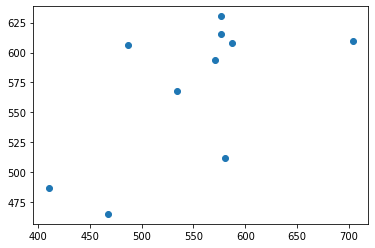

In [26]:
plt.scatter(y_test,tuned_pred)

In [27]:
print("Training set score: {:.7f}".format(tuned_hyper_model.score(X_train, y_train)))
print("Test set score: {:.7f}".format(tuned_hyper_model.score(X_test, y_test)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tuned_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tuned_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

Training set score: 0.8574831
Test set score: 0.3146026
Mean Absolute Error: 53.05211180124221
Mean Squared Error: 4016.044876359361
Root Mean Squared Error: 63.37227214136606


# Conclusion
###### We got better model accuracy via hyper parameter tuning (53.05 MAE, 4016.04 MSE, 63.3722 RMSE values) compared with defult parameter.

**Hyper parameter:**
* Mean Absolute Error: 53.0521
* Mean Squared Error: 4016.044
* Root Mean Squared Error: 63.372

**Defualt parameter:**
* Mean Absolute Error: 49.059
* Mean Squared Error: 4300.907
* Root Mean Squared Error: 65.5813

.

I have tried this same usecase using Decision tree regression algorithum. Herewith i have attached Decision tree model result;
[here](https://github.com/shulaxshan/Decision-tree-regressions)

**Defult paramter :**
*   Mean Absolute Error: 50.8
*   Mean Squared Error: 4535.4
* Root Mean Squared Error: 67.34537846058926

**Hyper parameter tuning:**
* Mean Absolute Error: 68.76
* Mean Squared Error: 6904.035000000001
* Root Mean Squared Error: 83.09052292530117

Finally, i have achieved best accuray from Random Forest with hyperparameter tuning.
